<a href="https://colab.research.google.com/github/joluispuma/Analisis_Pro_Banking/blob/andrew/AnalisisProBanking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presentación

# Justificación

# Analítica descriptiva

In [6]:
# Almacenar estadísticas descriptivas básicas (media, min, max, std, etc.)
estadisticas_g = df.describe()

# Calcular la moda de cada columna (valor más frecuente)
moda = df.mode().iloc[0]
estadisticas_g

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


## **¿Que pasa con los datos?**

**Distribuciones univariadas**

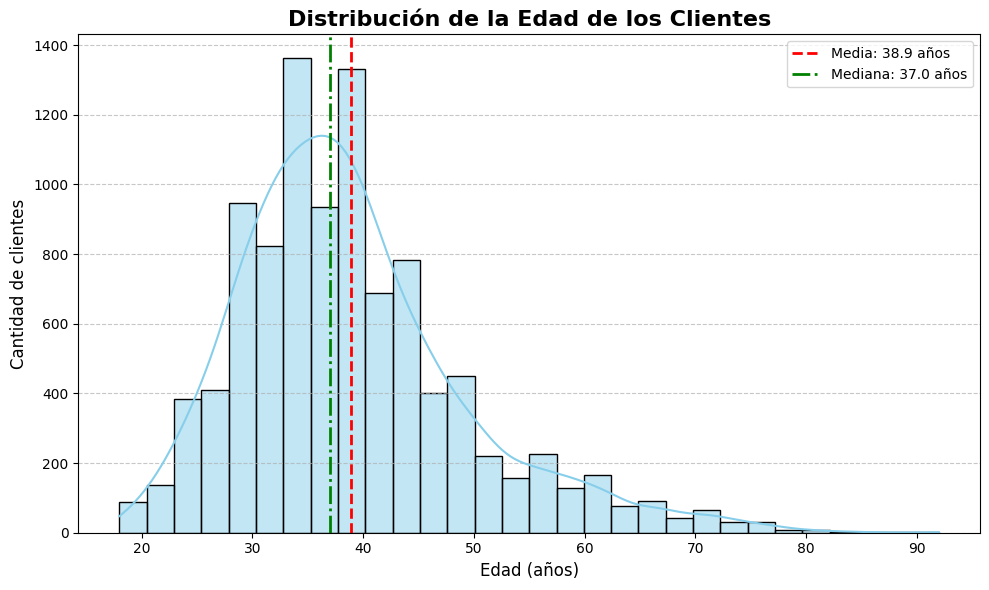

In [7]:
# =====================================================
# GRAFICO 1: Distribución de la edad de los clientes
# =====================================================

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Tamaño del marco del grafico

# Histograma con línea KDE
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue', edgecolor='black')

# Líneas de media y mediana para mejor análisis descriptivo
plt.axvline(df['Age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df["Age"].mean():.1f} años')
plt.axvline(df['Age'].median(), color='green', linestyle='-.', linewidth=2, label=f'Mediana: {df["Age"].median():.1f} años')

# Títulos y etiquetas
plt.title('Distribución de la Edad de los Clientes', fontsize=16, fontweight='bold')
plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Cantidad de clientes', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Distribución de género (conteo):
 Gender
Male      5457
Female    4543
Name: count, dtype: int64

Distribución de género (porcentaje):
 Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64


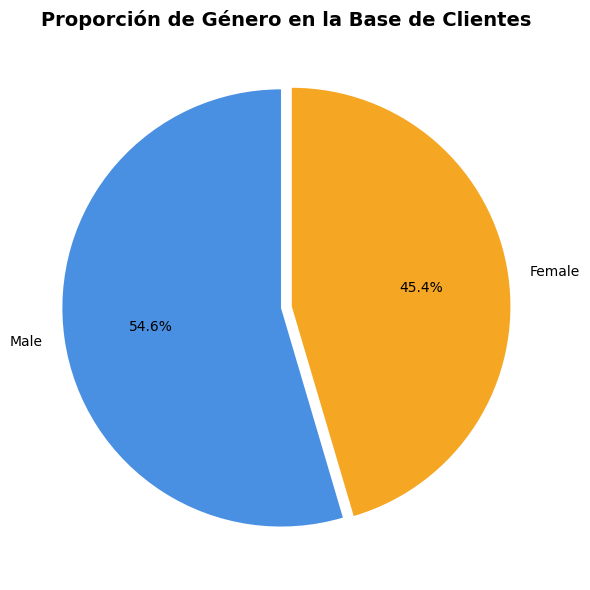

In [9]:
# =====================================================
# GRAFICO 2: Proporción de hombres y mujeres
# =====================================================

# Conteo de género
gender_counts = df['Gender'].value_counts()
gender_percent = df['Gender'].value_counts(normalize=True) * 100

# Mostrar distribución numérica y porcentual
print("Distribución de género (conteo):\n", gender_counts)
print("\nDistribución de género (porcentaje):\n", gender_percent.round(2))

# Gráfico de pastel
plt.figure(figsize=(6, 6))
colors = ['#4A90E2', '#F5A623']  # Colores diferenciados
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors, startangle=90, explode=(0.05, 0))
# Títulos y etiquetas
plt.title('Proporción de Género en la Base de Clientes', fontsize=14, fontweight='bold')

plt.axis('equal')  # Mantiene el círculo redondo

plt.tight_layout()
plt.show()


Distribución de satisfacción (conteo):
 Satisfaction Score
1    1932
2    2014
3    2042
4    2008
5    2004
Name: count, dtype: int64

Distribución de satisfacción (porcentaje):
 Satisfaction Score
1    19.32
2    20.14
3    20.42
4    20.08
5    20.04
Name: proportion, dtype: float64

Media de satisfacción: 3.01
Moda de satisfacción: 3


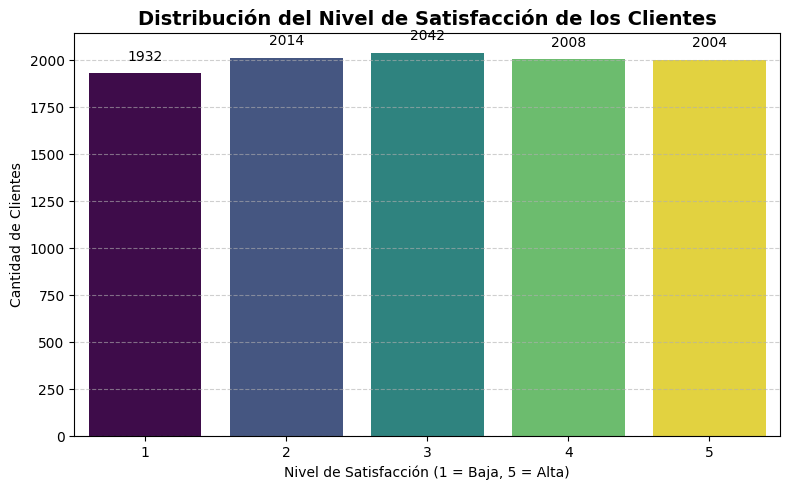

In [11]:
# =====================================================
# GRAFICO 3: Distribución del nivel de satisfacción
# =====================================================

# Conteo absoluto y relativo
satisfaction_counts = df['Satisfaction Score'].value_counts().sort_index()
satisfaction_percent = df['Satisfaction Score'].value_counts(normalize=True).sort_index() * 100

# Mostrar resumen numérico
print("Distribución de satisfacción (conteo):\n", satisfaction_counts)
print("\nDistribución de satisfacción (porcentaje):\n", satisfaction_percent.round(2))
print(f"\nMedia de satisfacción: {df['Satisfaction Score'].mean():.2f}")
print(f"Moda de satisfacción: {df['Satisfaction Score'].mode()[0]}")

satisfaction_df = satisfaction_counts.reset_index()
satisfaction_df.columns = ['Satisfaction', 'Count']

plt.figure(figsize=(8, 5))
sns.barplot(data=satisfaction_df, x='Satisfaction', y='Count', hue='Satisfaction', palette='viridis', legend=False)
plt.title('Distribución del Nivel de Satisfacción de los Clientes', fontsize=14, fontweight='bold')
plt.xlabel('Nivel de Satisfacción (1 = Baja, 5 = Alta)')
plt.ylabel('Cantidad de Clientes')

for i, val in enumerate(satisfaction_df['Count']):
    plt.text(i, val + 50, str(val), ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Análisis bivariado (relaciones simples)**

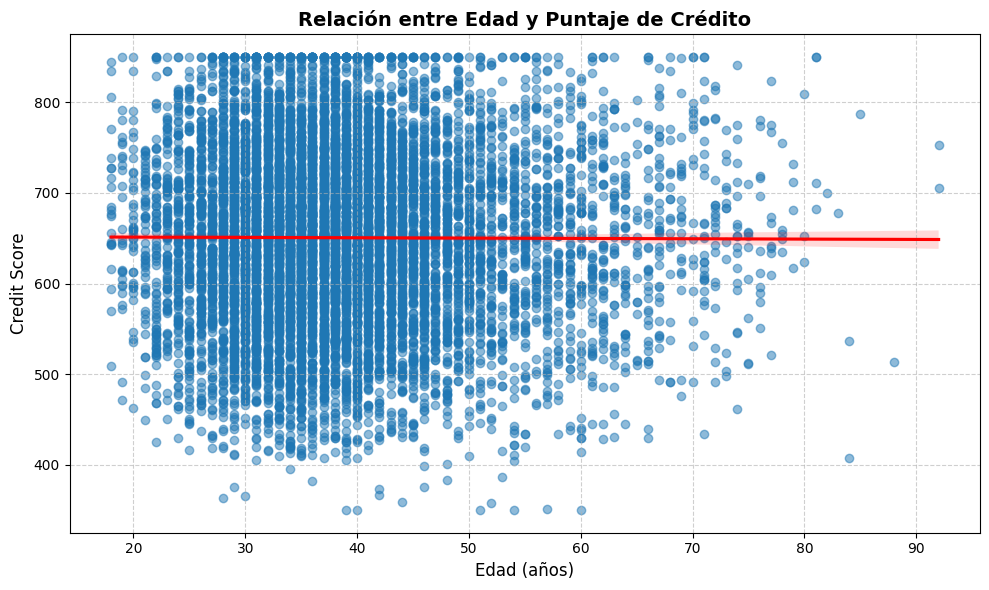

In [12]:
# =====================================================
# GRAFICO 4: Relación entre Edad y Credit Score
# =====================================================

plt.figure(figsize=(10, 6))

# Gráfico de dispersión con línea de regresión
sns.regplot(data=df, x='Age', y='CreditScore', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Títulos y etiquetas
plt.title('Relación entre Edad y Puntaje de Crédito', fontsize=14, fontweight='bold')
plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Credit Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Distribución porcentual de clientes por nivel de satisfacción y abandono:

                    Retenidos (%)  Desertores (%)
Satisfaction Score                               
1                           79.97           20.03
2                           78.20           21.80
3                           80.36           19.64
4                           79.38           20.62
5                           80.19           19.81


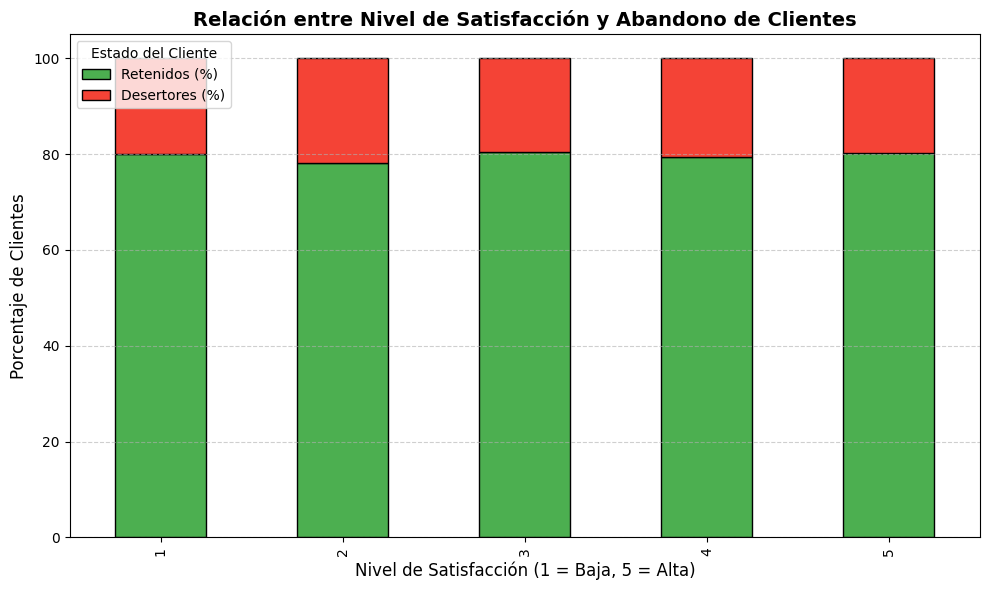

In [13]:
# =====================================================
# GRAFICO 5: Relación entre Satisfacción y Abandono (Exited)
# =====================================================

# Crear tabla cruzada
satisfaction_exited = pd.crosstab(df['Satisfaction Score'], df['Exited'], normalize='index') * 100
satisfaction_exited.columns = ['Retenidos (%)', 'Desertores (%)']

# Mostrar la tabla
print("Distribución porcentual de clientes por nivel de satisfacción y abandono:\n")
print(satisfaction_exited.round(2))

# Gráfico de barras apiladas
satisfaction_exited.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#4CAF50', '#F44336'], edgecolor='black')

# Títulos y etiquetas
plt.title('Relación entre Nivel de Satisfacción y Abandono de Clientes', fontsize=14, fontweight='bold')
plt.xlabel('Nivel de Satisfacción (1 = Baja, 5 = Alta)', fontsize=12)
plt.ylabel('Porcentaje de Clientes', fontsize=12)
plt.legend(title='Estado del Cliente', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

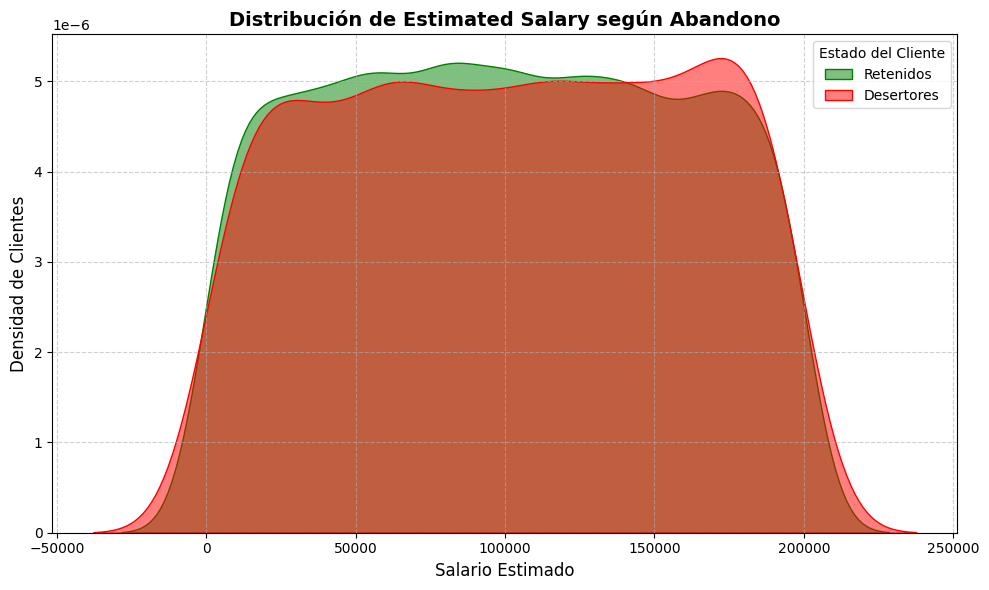

In [14]:
# =====================================================
# GRAFICO 6: Distribución de EstimatedSalary según abandono
# =====================================================

plt.figure(figsize=(10, 6))

# Gráfico de distribución KDE para comparar
sns.kdeplot(data=df[df['Exited'] == 0], x='EstimatedSalary', fill=True, label='Retenidos', color='green', alpha=0.5)
sns.kdeplot(data=df[df['Exited'] == 1], x='EstimatedSalary', fill=True, label='Desertores', color='red', alpha=0.5)

# Títulos y etiquetas
plt.title('Distribución de Estimated Salary según Abandono', fontsize=14, fontweight='bold')
plt.xlabel('Salario Estimado', fontsize=12)
plt.ylabel('Densidad de Clientes', fontsize=12)
plt.legend(title='Estado del Cliente')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Ingestión de Datos

In [5]:
import pandas as pd
import numpy as np

# Carga de datos
df = pd.read_csv('/content/Bank-Customer-Attrition-Insights-Data.csv')

#Validacion de encabezados
print("Primeras filas:")
print(df.head())


Primeras filas:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15598695    Fields          619    France  Female   42   
1          2    15649354  Johnston          608     Spain  Female   41   
2          3    15737556  Vasilyev          502    France  Female   42   
3          4    15671610    Hooper          699    France  Female   39   
4          5    15625092   Colombo          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1 

# Preparación y Limpieza

In [3]:
# tipos de datos y validacion de nulos
print("\nInformación general:")
print(df.info())

print("\nCantidad de nulos en cada columna:")
print(df.isnull().sum())

print("\nCantidad de duplicados:")
print("Duplicados :", df.duplicated().sum())
# Importe de librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# EXPLORACIÓN INICIAL DE LOS DATOS
# ================================

# Mostrar estructura general del DataFrame (tipos de datos, columnas, etc.)
info_df = df.info()

# Verificar valores nulos por columna
faltantes = df.isnull().sum()

# Verificar cantidad de filas duplicadas
duplicados = df.duplicated().sum()


Información general:


NameError: name 'df' is not defined

# Análisis de Negocio

**Preguntas de análisis de negocio:**



**Perfil y segmentación de clientes**
* ¿Cuál es la distribución de tipos de tarjeta entre los clientes?
* ¿Cuál es la edad promedio de los clientes con mayor Credit Score?
* ¿Cuál es el promedio de productos bancarios contratados por sexo?

**Uso y actividad financiera**
* ¿Cuál es el balance promedio de los clientes activos (IsActiveMember = 1)?
* ¿Cuál es la geografía con mayor proporción de clientes activos?
* ¿Cuál es el salario promedio de los clientes que más consumen?

**Satisfacción y abandono**
* ¿Cuál es el nivel promedio de satisfacción por tipo de tarjeta?
* ¿Los clientes que se quejan (Complain = 1) tienen mayor probabilidad de abandonar el banco?
* ¿Cómo varía la tasa de abandono por region (Geography)?
* ¿Cuál es el perfil (edad, sexo, tipo de tarjeta, saldo) de los clientes que han abandonado? **<----Aplicar clusters.**

**Relaciones y análisis predictivo**
* ¿Existe una correlación significativa entre edad y Credit Score?
* ¿Qué características comparten los clientes con alto engagement (medido por Point Earned, NumOfProducts, IsActiveMember = 1)?
* ¿Cómo varían los puntajes de satisfacción según el número de productos contratados?


**Data dictionary:**

**Nulos:**
La base de datos no tiene valores nulos en ninguna de sus 18 columnas. Esto es muy conveniente, pues así podremos avanzar sin tener que aplicar métodos de eliminación de nulos.

**Duplicados:**
La base de datos tiene 0 duplicados, por lo cual no es necesario realizar validacion y control de duplicados.

**Estructura:**
Hay tanto variables categóricas (Geography, Gender, Card Type) como numéricas (CreditScore, Age, Balance, Point Earned) e indicatorias (Complain, HasCrCard) en el conjunto de datos.

La variable Complain tiene 0 o 1.

La variable Satisfaction Score tiene una escala de 1 a 5.

La variable Exited (nuestro objetivo analitico) también tiene 0 o 1.